# Neural Networks Assignment
## Gas Turbines data
predicting turbine energy yield (TEY) using ambient variables as features.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

In [2]:
data = pd.read_csv('gas_turbines.csv')

### Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

| Variable (Abbr.)                    | Unit | Min    | Max    | Mean   |
|-------------------------------------|------|--------|--------|--------|
| Ambient temperature (AT)            | C    | 6.23   | 37.10  | 17.71  |
|Ambient pressure (AP)                | mbar | 985.85 | 1036.56| 1013.07|
|Ambient humidity (AH)                | (%)  | 24.08  | 100.20 | 77.87  |
|Air filter difference pressure (AFDP)| mbar | 2.09   | 7.61   | 3.93   |
|Gas turbine exhaust pressure (GTEP)  | mbar | 17.70  | 40.72  | 25.56  |
|Turbine inlet temperature (TIT)      | C    | 1000.85| 1100.89| 1081.43|
|Turbine after temperature (TAT)      | C    | 511.04 | 550.61 | 546.16 |
|Compressor discharge pressure (CDP)  | mbar | 9.85   | 15.16  | 12.06  |
|Turbine energy yield (TEY)           | MWH  | 100.02 | 179.50 | 133.51 |
|Carbon monoxide (CO)                 | mg/m3| 0.00   | 44.10  | 2.37   |
|Nitrogen oxides (NOx)                | mg/m3| 25.90  | 119.91 | 65.29  |


In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### Data Visualization

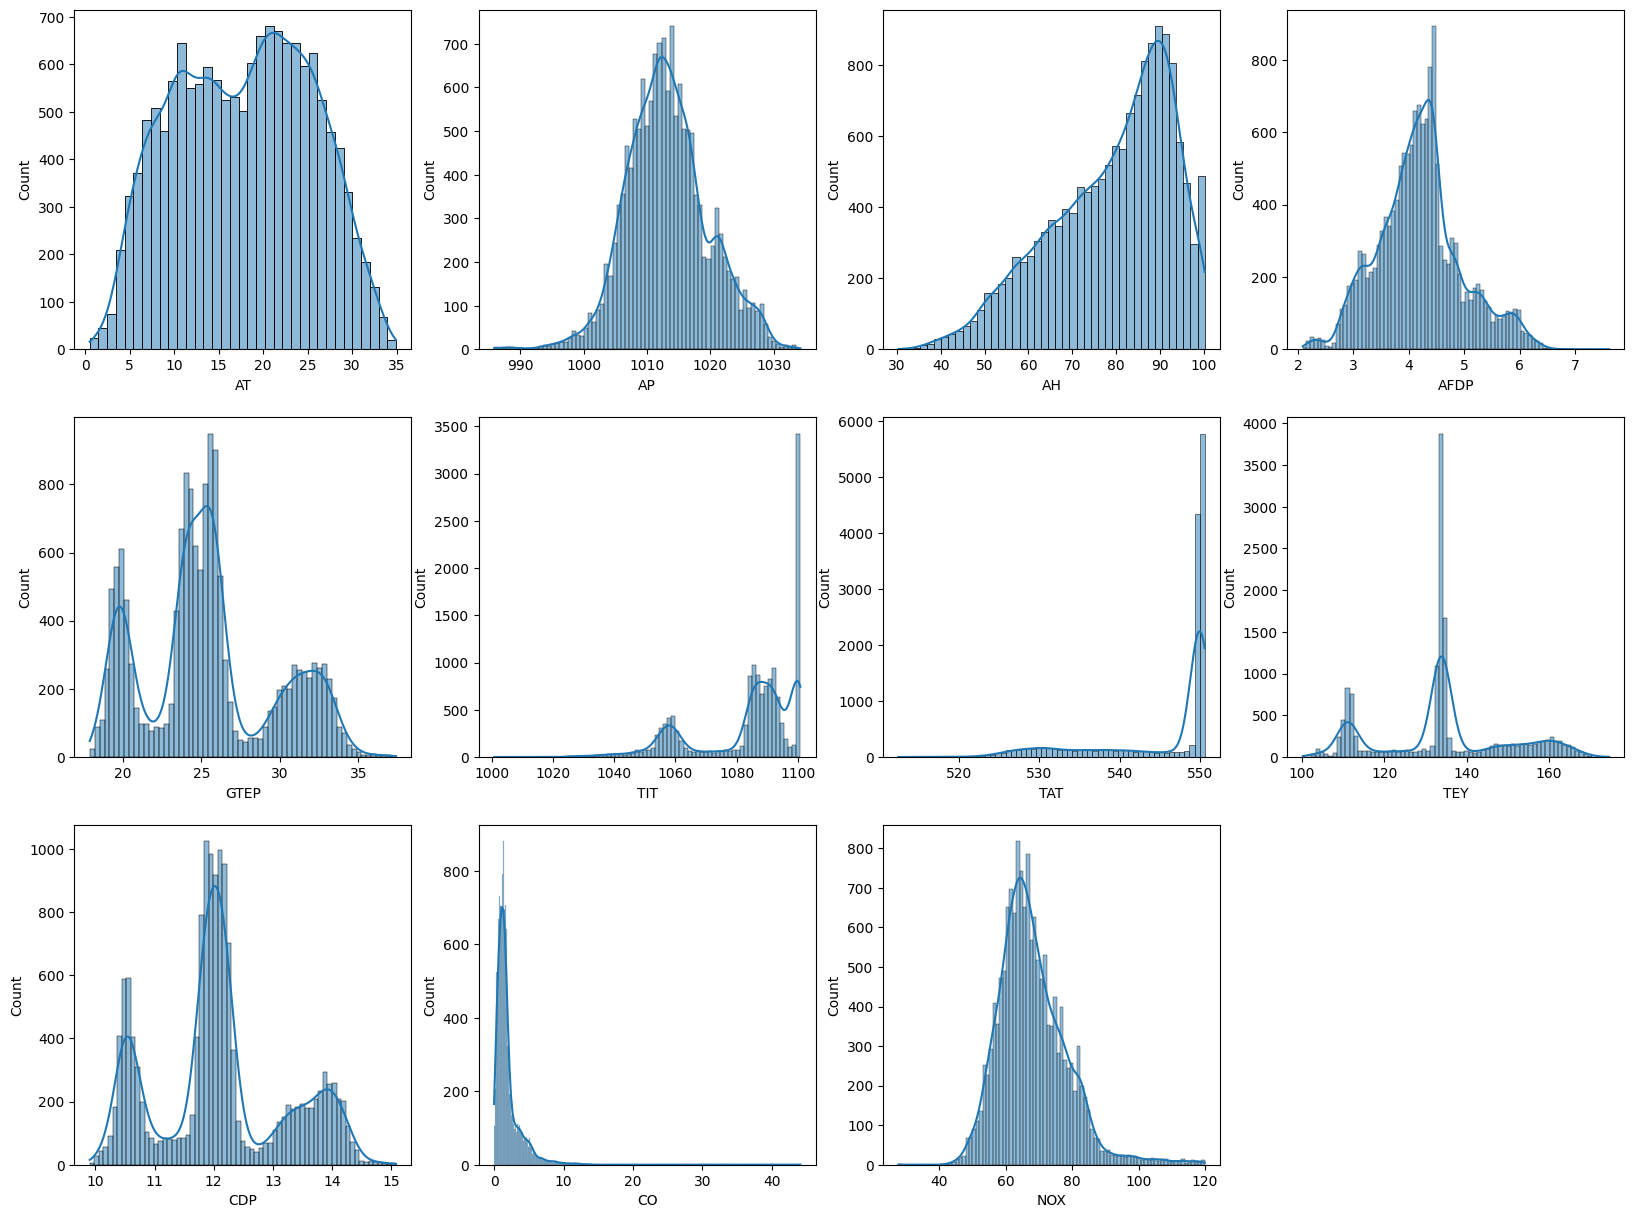

In [7]:
plt.figure(figsize=(20,15))
for i in range(len(data.columns)):
    plt.subplot(3,4,i+1)
    sns.histplot(data=data, x=data.columns[i], kde=True)

### Preparing data for model

In [8]:
x = data.drop('TEY', axis=1)
y = data['TEY']

In [10]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x.shape

(15039, 10)

In [13]:
def create_model():
    model = Sequential([
        Dense(20, input_dim=10, activation='relu'),
        Dense(27,activation='relu'),
        Dense(1, activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
model = create_model()
history = model.fit(x,y,validation_split=0.2,epochs=20,batch_size=557)

Epoch 1/20
22/22 [==============================] - 3s 38ms/step - loss: 18357.8867 - accuracy: 0.0000e+00 - val_loss: 17371.1309 - val_accuracy: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 18134.1660 - accuracy: 0.0000e+00 - val_loss: 17099.2148 - val_accuracy: 0.0000e+00
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 17779.3789 - accuracy: 0.0000e+00 - val_loss: 16703.4766 - val_accuracy: 0.0000e+00
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 17269.3574 - accuracy: 0.0000e+00 - val_loss: 16133.2549 - val_accuracy: 0.0000e+00
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 16536.2227 - accuracy: 0.0000e+00 - val_loss: 15318.5000 - val_accuracy: 0.0000e+00
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 15507.7969 - accuracy: 0.0000e+00 - val_loss: 14203.9570 - val_accuracy: 0.0000e+00
Epoch 7/20
22/22 [==============================] - 0s 3ms/step

In [9]:
model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)
batch_size = [300,557,700]
epochs = [20,40,60,80]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=300, epochs=20..................................


C:\Users\anike\AppData\Local\Temp\ipykernel_27328\4017668349.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)


[CV 1/5; 1/12] END batch_size=300, epochs=20;, score=-18803.992 total time=   3.6s
[CV 2/5; 1/12] START batch_size=300, epochs=20..................................
[CV 2/5; 1/12] END .batch_size=300, epochs=20;, score=-17.556 total time=   4.4s
[CV 3/5; 1/12] START batch_size=300, epochs=20..................................
[CV 3/5; 1/12] END .batch_size=300, epochs=20;, score=-21.027 total time=   4.1s
[CV 4/5; 1/12] START batch_size=300, epochs=20..................................
[CV 4/5; 1/12] END .batch_size=300, epochs=20;, score=-17.522 total time=   4.0s
[CV 5/5; 1/12] START batch_size=300, epochs=20..................................
[CV 5/5; 1/12] END .batch_size=300, epochs=20;, score=-18.204 total time=   3.6s
[CV 1/5; 2/12] START batch_size=300, epochs=40..................................
[CV 1/5; 2/12] END ..batch_size=300, epochs=40;, score=-4.742 total time=   6.6s
[CV 2/5; 2/12] START batch_size=300, epochs=40..................................
[CV 2/5; 2/12] END ..batch

In [12]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: -1.0269077122211456, using {'batch_size': 300, 'epochs': 80}


<Axes: xlabel='param_epochs', ylabel='param_batch_size'>

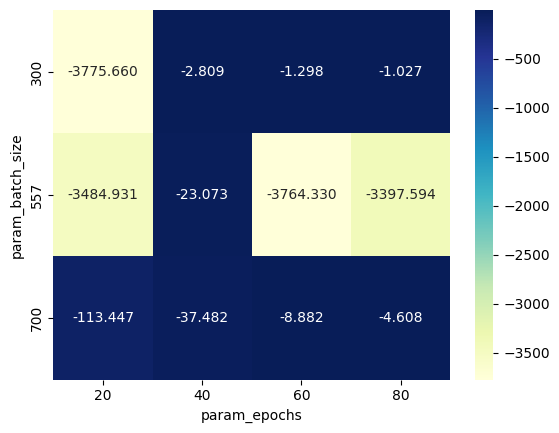

In [13]:
import seaborn as sns
grid_result_df = pd.DataFrame(grid_result.cv_results_)
mean_scores = grid_result_df.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_epochs')
sns.heatmap(mean_scores, cmap="YlGnBu", annot=True, fmt=".3f")

In [14]:
model = create_model()
history = model.fit(x,y,validation_split=0.2,epochs=80,batch_size=300)

Epoch 1/80
41/41 [==============================] - 1s 7ms/step - loss: 17471.7539 - accuracy: 0.0000e+00 - val_loss: 12876.1611 - val_accuracy: 0.0000e+00
Epoch 2/80
41/41 [==============================] - 0s 3ms/step - loss: 6022.0439 - accuracy: 0.0000e+00 - val_loss: 1570.0978 - val_accuracy: 0.0000e+00
Epoch 3/80
41/41 [==============================] - 0s 3ms/step - loss: 982.7714 - accuracy: 0.0000e+00 - val_loss: 457.5390 - val_accuracy: 0.0000e+00
Epoch 4/80
41/41 [==============================] - 0s 3ms/step - loss: 429.9742 - accuracy: 0.0000e+00 - val_loss: 259.7117 - val_accuracy: 0.0000e+00
Epoch 5/80
41/41 [==============================] - 0s 4ms/step - loss: 279.1302 - accuracy: 0.0000e+00 - val_loss: 173.8171 - val_accuracy: 0.0000e+00
Epoch 6/80
41/41 [==============================] - 0s 4ms/step - loss: 191.6091 - accuracy: 0.0000e+00 - val_loss: 134.5469 - val_accuracy: 0.0000e+00
Epoch 7/80
41/41 [==============================] - 0s 4ms/step - loss: 140.2659 -

In [ ]:
history.hi